# 단순회귀분석
1세대당　연간수입과 1개월 지출

#### 데이터 수집 압법
가계조사결과，총무성통계국　http://www.stat.go.jp/data/kakei/index.htm    
->“조사 결과”  
->“결과의 개요（가계수지편）”  
-> "과거의 결과”의 "가계조사연표（가계수지편）”  
->“가계조사연표（총세대・2인 이상의 세대・단독세대）”“2016년 연보”  
->“2016년　가계의 개요” の“2인 이상 세대”  
->“연간 수입 5분위・10분위 계급별”，ECXEL을 다운로드“fn03.xls”  
이 Excel 파일, 연간 수입 10분위계급부터，  
연간수입(만엔) -> "income"  
소비지출 -> "expenditure" 
엥겔계수（％） -> "engel"
이라고 표현하여，데이터를 작성.

#### 단순회귀분석의 해석과 API
statsmodels이 가지는 회귀모델과 가정하는 조건　http://www.statsmodels.org/stable/regression.html  
계산은 OLS를 이용　Ordinary Least Squares　http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html  
OLS의 파라미터를 제공하는 편이 불편하다고 생각하면 R 식으로 주는 것도 가능한 방법　http://www.statsmodels.org/dev/example_formulas.html

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

FLAG_fig = False

In [2]:
url = 'https://sites.google.com/site/datasciencehiro/datasets/FamilyIncome.csv'
df = pd.read_csv(url, comment='#')
df_save = df.copy() # deep copy
print(df)
print(df.shape)
df.corr()

   income  expenditure  engel
0     216       172462   30.8
1     304       204599   29.9
2     356       224776   28.8
3     413       240153   27.8
4     481       255497   27.3
5     555       275490   25.9
6     642       295447   25.7
7     752       323072   24.7
8     902       362769   23.4
9    1461       467616   21.8
(10, 3)


,income,expenditure,engel
income,1.000000,0.993658,-0.939229
expenditure,0.993658,1.000000,-0.969612
engel,-0.939229,-0.969612,1.000000


ols(ordinary least squares、최소제곱)법을 이용하여 단순회귀모델을 구한다.<br>
https://en.wikipedia.org/wiki/Ordinary_least_squares
데이터 수 < 20 의 경우에는、첨도（kurtosis）의 평가（ols에서는 kurtosistest라고 표현）가 유효할 수 없다는 warning 메세지가 나타나지만、여기에서는 이 평가는 사용되지 않으므로 무시한다.<br>
scipy.stats.kurtosistest https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kurtosistest.html <br>
Kurtosis: https://en.wikipedia.org/wiki/Kurtosis

In [7]:
result = smf.ols('expenditure ~ income', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     624.7
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           7.02e-09
Time:                        18:29:08   Log-Likelihood:                -105.43
No. Observations:                  10   AIC:                             214.9
Df Residuals:                       8   BIC:                             215.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.4e+05   6550.516     21.366      0.0

C:\Users\yoonjun\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


$P > |t|$는，계수가 0인 확률，이것이 매우 작다면，0이 아니라고 할 수 있다.

In [4]:
result.params

Intercept    139956.859032
income          233.856036
dtype: float64

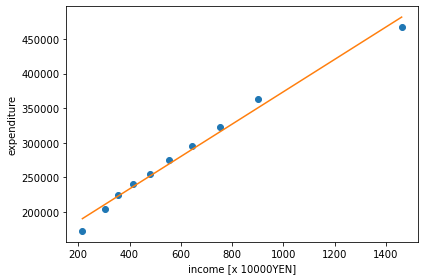

In [10]:
b0, b1 = result.params
plt.plot(df['income'],df['expenditure'], 'o')
plt.plot(df['income'], b0+b1*df['income'], c='k') # c 색깔.

plt.xlabel('income [x 10000YEN]')
plt.ylabel('expenditure')

plt.tight_layout()
if FLAG_fig: plt.savefig('REG_Simple_FamilyIncome1.png')
plt.show()

#### 예측

In [6]:
NewData = {'income':[1100,1200]}
df = pd.DataFrame(NewData)
pred = result.predict(df)
pred

0    397198.498402
1    420584.101981
dtype: float64

다음은 동일한 것을 계산하고 있다

In [7]:
pred = b0 + b1*1100
pred

397198.4984021404

위의 그래프를 보면, 최저수입과 최고수입 데이터가 매우 벗어난 것을 보이므로，이 점을 제외하고 회귀분석을 다시 실시한다.

In [8]:
df1=df_save.copy()

In [9]:
df1.drop(9, inplace=True)
df1.drop(0, inplace=True)

In [10]:
result = smf.ols('expenditure ~ income', data=df1).fit()
result.summary()

C:\Users\KTKwon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2889.
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           2.78e-09
Time:                        17:12:54   Log-Likelihood:                -73.085
No. Observations:                   8   AIC:                             150.2
Df Residuals:                       6   BIC:                             150.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.314e+05   2784.282     47.195      0.000    1.25e+05    1.38e+05
income       256.6572      4.775     53.754      0.000     244.974     268.340
==============================================================================
Omnibus:                        3.508   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.091
Skew:                          -0.903   Prob(JB):                        0.580
Kurtosis:                       3.086   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

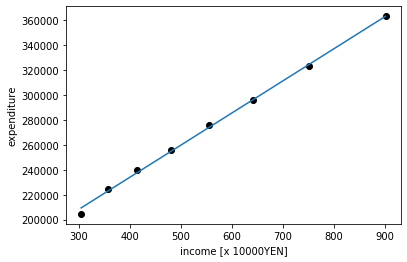

In [11]:
a, b = result.params
plt.plot(df1['income'],df1['expenditure'], 'o', c='k')
plt.plot(df1['income'], a+b*df1['income'])

plt.xlabel('income [x 10000YEN]')
plt.ylabel('expenditure')
plt.show()

In [12]:
result = smf.ols('engel ~ income', data=df1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  engel   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     152.7
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           1.71e-05
Time:                        17:13:16   Log-Likelihood:                -3.8878
No. Observations:                   8   AIC:                             11.78
Df Residuals:                       6   BIC:                             11.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.3795      0.488     66.379      0.000      31.186      33.573
income        -0.0103      0.001    -12.358      0.000      -0.012      -0.008
==============================================================================
Omnibus:                        0.613   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.090
Skew:                          -0.217   Prob(JB):                        0.956
Kurtosis:                       2.717   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

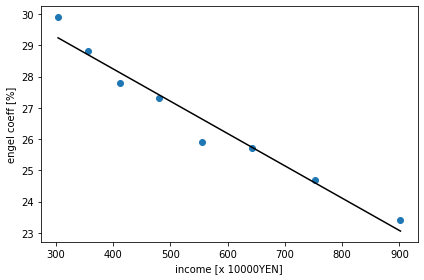

In [13]:
a, b = result.params
plt.plot(df1['income'],df1['engel'], 'o')
plt.plot(df1['income'], a+b*df1['income'], c='k')

plt.xlabel('income [x 10000YEN]')
plt.ylabel('engel coeff [%]')

plt.tight_layout()
if FLAG_fig: plt.savefig('REG_Simple_FamilyIncome2.png')
plt.show()

# 다항식 회귀분석
R 데이터 세트인 cars를 이용한다.
이 데이터 세트를 사용하기 위해서는，패키지 rpy2를 사전에 설치한다<br>
Documentation for rpy2 https://rpy2.readthedocs.io/en/version_2.8.x/<br>

cars의 설명 : 다음 사이트에서 cars를 검색  
https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html

In [33]:
# -*- coding: utf-8 -*-
import os
os.environ['R_HOME'] = "C:\Program Files\R\R-4.0.4"
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

FLAG_fig = False

In [35]:
df = r['cars']  # read datasets of cars
x = df.speed
df

,speed,dist
1,4.0,2.0
2,4.0,10.0
3,7.0,4.0
4,7.0,22.0
5,8.0,16.0
6,9.0,10.0
7,10.0,18.0
8,10.0,26.0
9,10.0,34.0
10,11.0,17.0


#### 1차 모델
$y = b_0 + b_1 x$

In [36]:
result1 = smf.ols('dist ~ speed', data=df).fit()
print(result1.summary())
b0, b1 = result1.params

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.49e-12
Time:                        19:03:34   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0

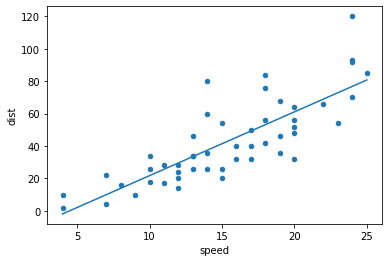

In [37]:
df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+b1*x)

if FLAG_fig: plt.savefig('fig_REG_poy_R_cars_01.eps')
plt.show()

#### 2차 모델
$y = b_0 + b_1 x + b_2 x^2$

df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+x*b1)

In [38]:
result2 = smf.ols('dist ~ np.power(speed,2) + speed', data=df).fit()
print(result2.summary())
b0, b2, b1 = result2.params

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     47.14
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           5.85e-12
Time:                        19:04:37   Log-Likelihood:                -205.39
No. Observations:                  50   AIC:                             416.8
Df Residuals:                      47   BIC:                             422.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4701     14

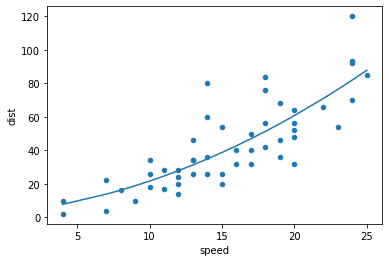

In [39]:
df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+b1*x+b2*(x**2))

if FLAG_fig: plt.savefig('fig_REG_poy_R_cars_02.eps')
plt.show()

#### 3차 모델
$y = b_0 + b_1  + b_2 x^2 + b_3 x^3$

In [40]:
result3 = smf.ols('dist ~ np.power(speed,3) + np.power(speed,2) + speed', data=df).fit()
print(result3.summary())
b0, b3, b2, b1 = result3.params

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     31.58
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           3.07e-11
Time:                        19:05:07   Log-Likelihood:                -204.94
No. Observations:                  50   AIC:                             417.9
Df Residuals:                      46   BIC:                             425.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -19.5050     28

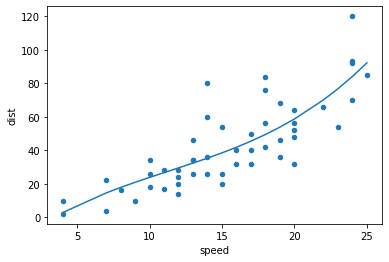

In [41]:
df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+b1*x+b2*(x**2) + b3*(x**3))

if FLAG_fig: plt.savefig('fig_REG_poy_R_cars_03.eps')
plt.show()

이와 같이 결과만으로 어떤 차수가 좋을지 판단하기 힘든 경우에는, 이 물리 모델에 준하는 회귀 모델(여기서는 2차)을 이용하는 것이 좋다.

## nupmy.polyfit（）를 이용한 곡선 적합의 예

[0.0999593  0.91328761 2.47013779]
         2
0.09996 x + 0.9133 x + 2.47


Text(0.5, 1.0, 'degree = 2')

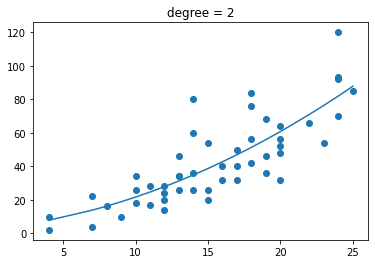

In [48]:
x = df.speed
y = df.dist
degree = 2
fit = np.polyfit(x, y, degree)
print(fit)
est = np.poly1d(fit)
print(est)
plt.scatter(x,y)
plt.plot(x,est(x))
plt.title('degree = %d' % degree)

[ 1.02520479e-02 -3.49657814e-01  6.80110597e+00 -1.95050491e+01]
         3          2
0.01025 x - 0.3497 x + 6.801 x - 19.51


Text(0.5, 1.0, 'degree = 3')

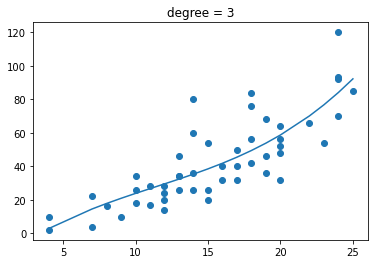

In [49]:
degree = 3
fit = np.polyfit(x, y, degree)
print(fit)
est = np.poly1d(fit)
print(est)
plt.scatter(x,y)
plt.plot(x,est(x))
plt.title('degree = %d' % degree)

#### 다음의 예는，오버피팅（over fitting）을 나타낸다

[-1.20583509e-06  1.58844338e-04 -9.04728718e-03  2.91745289e-01
 -5.85367394e+00  7.55386731e+01 -6.24503022e+02  3.17458505e+03
 -8.94788380e+03  1.05717941e+04]
            9             8            7          6         5         4
-1.206e-06 x + 0.0001588 x - 0.009047 x + 0.2917 x - 5.854 x + 75.54 x
          3        2
 - 624.5 x + 3175 x - 8948 x + 1.057e+04


Text(0.5, 1.0, 'degree = 9')

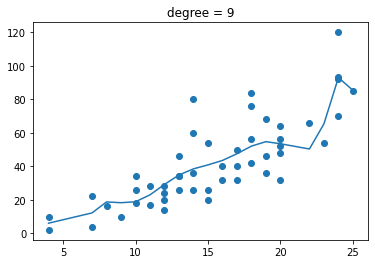

In [50]:
degree = 9
fit = np.polyfit(x, y, degree)
print(fit)
est = np.poly1d(fit)
print(est)
plt.scatter(x,y)
plt.plot(x,est(x))
plt.title('degree = %d' % degree)

# 중회귀분석
두 설명변수와 관계 없는 변수로 잘못된 모델

In [51]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

from mpl_toolkits.mplot3d import Axes3D # for 3D-graph, 명시적으로는 사용하지 않지만, 임포트할 필요가 있다

np.random.seed(123) #재현성을 얻기 위해
FLAG_fig = False

## F검정의 값을 살펴본다
실제 시스템：y = b1*x1 + b2*x2 + noise  
모델:　y = b1*x1 + b2*x2

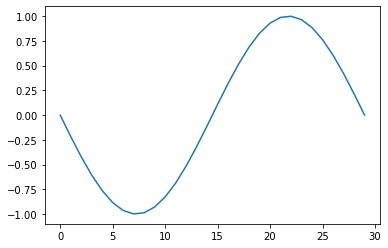

In [59]:
# 평균, 표준편차, 크기.
np.random.normal(0.0, 0.1, num)

# 시작값, 끝값, 크기.
a = np.linspace(-np.pi,np.pi,num)
a = np.sin(a)

plt.plot(range(30), a)

In [53]:
num = 30
noise = np.random.normal(0.0, 0.1, num)
rad = np.linspace(-np.pi,np.pi,num)
x1 = np.sin(rad)
x2 = np.random.normal(-2.0, 3.0, num)

In [54]:
b1, b2 = 1.1, -0.55 # beta_0, beta_1
y = b1*x1 + b2*x2 + noise
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              7133.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                    1.22e-38
Time:                        19:16:41   Log-Likelihood:                          25.202
No. Observations:                  30   AIC:                                     -46.40
Df Residuals:                      28   BIC:                                     -43.60
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0957      0.028     38.591      0.000       1.038       1.154
x2            -0.5482      0.005   -113.101      0.000      -0.558      -0.538
==============================================================================
Omnibus:                        1.603   Durbin-Watson:                   2.349
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.082
Skew:                           0.147   Prob(JB):                        0.582
Kurtosis:                       2.118   Cond. No.                         5.86
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
b1, b2 = 0.0001, -0.000055
y = b1*x1 + b2*x2 + noise
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.094
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              1.451
Date:                Fri, 27 Dec 2019   Prob (F-statistic):                       0.251
Time:                        18:07:50   Log-Likelihood:                          23.316
No. Observations:                  30   AIC:                                     -42.63
Df Residuals:                      28   BIC:                                     -39.83
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0479      0.031      1.521      0.140      -0.017       0.112
x2            -0.0064      0.006     -1.160      0.256      -0.018       0.005
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.872
Skew:                           0.350   Prob(JB):                        0.647
Kurtosis:                       2.545   Cond. No.                         5.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 다중공선성（multicollinearity）의 영향을 살펴본다

In [60]:
num = 30
rad = np.linspace(-np.pi, np.pi, num)
x1 = np.sin(rad)
x2 = np.random.normal(-2.0, 3.0, num)

b1, b2 = 3.3, -1.25
noise = 0.001*np.random.normal( 0.0, 1.0, num)
y = b1*x1 + b2*x2 + noise

관계 없는 x3를 측정한다고 가정한다

In [61]:
x3 = 3.35*np.sin((rad+0.001))+ 0.001*np.random.normal( 0.0, 1.0, num)
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3})

In [62]:
results = smf.ols('y ~ x1 + x2 + x3 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.729e+08
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                    2.00e-98
Time:                        19:21:26   Log-Likelihood:                          165.17
No. Observations:                  30   AIC:                                     -324.3
Df Residuals:                      27   BIC:                                     -320.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7487      0.241     15.558      0.000       3.254       4.243
x2            -1.2499   5.82e-05  -2.15e+04      0.000      -1.250      -1.250
x3            -0.1339      0.072     -1.861      0.074      -0.281       0.014
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.538
Skew:                          -0.035   Prob(JB):                        0.764
Kurtosis:                       2.348   Cond. No.                     4.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

"The condition number is large"라는 Warning 메시지가 나온 경우.<br>
condition number（조건수）는 행렬의 고윳값에서 계산되는 수치이고, 이 값이 클수록 연립방정식을 풀기 어려워지고,<br>
답에 오차가 포함될 가능성이 높다는 것을 시사한다. 따라서 출력된 수치해는, 맹목적으로 믿으면 안되고, 주의해서 살펴볼 필요가 있다.

#### 모델의 차수를 시스템에 포함시킨다

In [63]:
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.384e+08
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                   5.81e-102
Time:                        19:21:51   Log-Likelihood:                          163.36
No. Observations:                  30   AIC:                                     -322.7
Df Residuals:                      28   BIC:                                     -319.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3003      0.000   1.14e+04      0.000       3.300       3.301
x2            -1.2499   6.05e-05  -2.06e+04      0.000      -1.250      -1.250
==============================================================================
Omnibus:                        1.020   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                0.961
Skew:                           0.257   Prob(JB):                        0.619
Kurtosis:                       2.289   Cond. No.                         4.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ３D 그래프
참조　https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

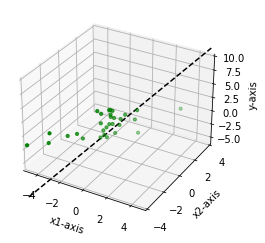

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 가로 레이블의 설정
ax.set_xlabel("x1-axis")
ax.set_ylabel("x2-axis")
ax.set_zlabel("y-axis")

# 표시 범위 설정
ax.set_xlim(-5, 5)
ax.set_ylim(-4, 4)
ax.set_zlim(-6, 10)

#관측 데이터의 그래프
ax.scatter(x1, x2, y, s=10, color='green')

# 모델 식의 표시
xx1 = np.linspace(-5,5,num)
xx2 = np.linspace(-4,4,num)

c1, c2 = results.params

y0 = c1*xx1 + c2*xx2
ax.plot(xx1, xx2, y0, color='black', linestyle='dashed')
plt.show()

# 중회귀분석
소비전력과 최고기온, 최저기온과의 관계를 분석한다

In [65]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

FLAG_fig = False

In [72]:
url = 'https://sites.google.com/site/datasciencehiro/datasets/ElectricPower.csv'
df_pow = pd.read_csv(url, comment='#', 
                    index_col='DATE', parse_dates=['DATE'],  
                     encoding='SHIFT-JIS' )
df_pow

,TIME,Power
DATE,,
2017-01-01,0:00,2783
2017-01-01,1:00,2634
2017-01-01,2:00,2520
2017-01-01,3:00,2438
2017-01-01,4:00,2389
...,...,...
2017-12-31,19:00,3527
2017-12-31,20:00,3443
2017-12-31,21:00,3335


In [3]:
df_pow.tail()

,TIME,Power
DATE,,
2017-12-31,19:00,3527
2017-12-31,20:00,3443
2017-12-31,21:00,3335
2017-12-31,22:00,3200
2017-12-31,23:00,3141


#### 다운 샘플링
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html  
시간축을 일단위로 하여, 최대전력만으로 한다

In [68]:
df_pow2 = df_pow.resample('D').max() # Day로 다운 샘플링한 최대전력

In [73]:
print(df_pow2)
print(df_pow2.shape)

            TIME  Power
DATE                   
2017-01-01  9:00   2935
2017-01-02  9:00   3086
2017-01-03  9:00   3240
2017-01-04  9:00   3571
2017-01-05  9:00   4142
...          ...    ...
2017-12-27  9:00   4413
2017-12-28  9:00   4174
2017-12-29  9:00   3772
2017-12-30  9:00   3511
2017-12-31  9:00   3589

[365 rows x 2 columns]
(365, 2)


#### 최고기온, 최저기온 데이터를 읽어들인다

In [76]:
df = pd.read_csv('https://sites.google.com/site/datasciencehiro/datasets/AirTemperature.csv', comment='#', 
                    index_col='Date', parse_dates=['Date'],  
                     encoding='SHIFT-JIS' )
print(df.head())
print(df.shape)

            MaxTemp  MinTemp
Date                        
2017-01-01     13.8      2.0
2017-01-02     13.3      3.8
2017-01-03     13.7      3.5
2017-01-04     14.0      3.6
2017-01-05     10.4      3.7
(365, 2)


#### 데이터 결합

In [77]:
df['MaxPower'] = df_pow2.Power

In [78]:
result = smf.ols('MaxPower ~ MaxTemp + MinTemp', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MaxPower   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3421
Date:                Wed, 21 Apr 2021   Prob (F-statistic):              0.711
Time:                        19:26:32   Log-Likelihood:                -2799.2
No. Observations:                 365   AIC:                             5604.
Df Residuals:                     362   BIC:                             5616.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3919.7384    104.068     37.665      0.0

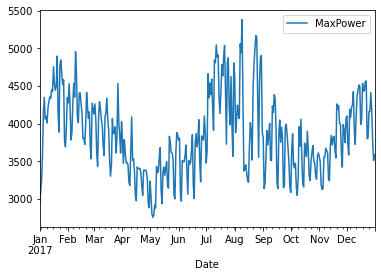

In [79]:
df.MaxPower.plot()
plt.legend()

if FLAG_fig: plt.savefig('REG_Multi_PowerTemp01.png')
plt.show()

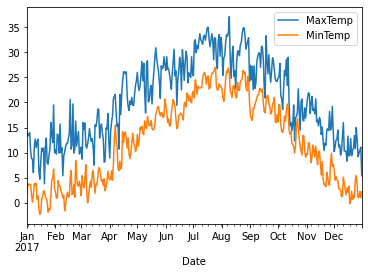

In [80]:
df.MaxTemp.plot()
df.MinTemp.plot()
plt.legend()

if FLAG_fig: plt.savefig('REG_Multi_PowerTemp02.png')
plt.show()

In [12]:
df1 = df['2017/1/15':'2017/4/30']
df2 = df['2017/5/1':'2017/8/31']

In [14]:
result1 = smf.ols('MaxPower ~ MaxTemp + MinTemp', data=df1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MaxPower   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     124.4
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           3.41e-28
Time:                        18:43:15   Log-Likelihood:                -738.60
No. Observations:                 106   AIC:                             1483.
Df Residuals:                     103   BIC:                             1491.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4831.8773     89.797     53.809      0.000    4653.787    5009.968
MaxTemp      -49.5928      8.269     -5.998      0.000     -65.992     -33.194
MinTemp      -41.9843      9.837     -4.268      0.000     -61.495     -22.474
==============================================================================
Omnibus:                        5.362   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                2.912
Skew:                          -0.164   Prob(JB):                        0.233
Kurtosis:                       2.257   Cond. No.                         58.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#예측
NewData = {'MaxTemp':[18.5, 14.0], 'MinTemp':[9.0, 6.5]}
NewDf = pd.DataFrame(NewData)
NewDf

,MaxTemp,MinTemp
0,18.5,9.0
1,14.0,6.5


In [16]:
pred = result.predict(NewDf)
pred

0    3857.418964
1    3872.206192
dtype: float64

In [17]:
result2 = smf.ols('MaxPower ~ MaxTemp + MinTemp', data=df2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MaxPower   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     136.5
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           1.22e-31
Time:                        18:46:46   Log-Likelihood:                -896.64
No. Observations:                 123   AIC:                             1799.
Df Residuals:                     120   BIC:                             1808.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    400.5727    232.395      1.724      0.087     -59.553     860.699
MaxTemp       65.9611     12.546      5.258      0.000      41.122      90.801
MinTemp       78.7165     12.934      6.086      0.000      53.107     104.326
==============================================================================
Omnibus:                       18.757   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.456
Skew:                          -0.494   Prob(JB):                      0.00884
Kurtosis:                       2.067   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 레드와인의 품질을 회귀분석
데이터 세트의 설명　Wine Quality Data Set　（ UCI　Machine Learning Repository） http://archive.ics.uci.edu/ml/datasets/Wine+Quality
->DataFolder, "winequality-red.csv"  
이 파일명의 공백을 언더라인으로 변환하여, 이것을 “winequality-red_mod.csv”라는 이름으로 아래의 클라우드에 업로드했다

In [81]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
url='https://sites.google.com/site/datasciencehiro/datasets/winequality-red_mod.csv'
wine_set = pd.read_csv(url, sep=";")
wine_set.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
ols_model = "quality ~  volatile_acidity + chlorides + total_sulfur_dioxide + sulphates + alcohol"
results = smf.ols(formula = ols_model, data=wine_set).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     172.7
Date:                Wed, 21 Apr 2021   Prob (F-statistic):          5.48e-147
Time:                        19:28:35   Log-Likelihood:                -1580.4
No. Observations:                1599   AIC:                             3173.
Df Residuals:                    1593   BIC:                             3205.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.0049      0.204     14.747      0.000       2.605       3.405
volatile_acidity        -1.1419      0.097    -11.779      0.000      -1.332      -0.952
chlorides               -1.7048      0.392     -4.352      0.000      -2.473      -0.937
total_sulfur_dioxide    -0.0023      0.001     -4.544      0.000      -0.003      -0.001
sulphates                0.9148      0.110      8.296      0.000       0.699       1.131
alcohol                  0.2771      0.016     16.811      0.000       0.245       0.309
==============================================================================
Omnibus:                       25.233   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.739
Skew:                          -0.153   Prob(JB):                     6.38e-09
Kurtosis:                       3.688   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 일반화 선형모델　포아송 회귀모델

Ref. 
 Possion GLM, https://onlinecourses.science.psu.edu/stat504/node/169  
 
$\lambda = \exp(\beta_0+ \beta_1)$

In [96]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
FLAG_fig = False

#### 포아송 분포를 따르는 확률변수 ｙ의 데이터 생성
$\lambda = \exp(\beta_0), \hspace{3mm} \beta_1 = 0$ 인 경우  
평균값을 lam이라고 둔다

In [84]:
Num = 1000
lam = 5 # lambda
y = np.random.poisson(lam,Num)
print(y)

[ 4  1  6  9  3  3  5  2  5  5  4  6  6  3  4  4  4  8  9  7  4  3  5  7
  5  4  4  5  5 13  6  4  5  4  4  4  9  6  7  6  4  7  6  7  4  5  8  3
  5  6  2  6  5  5 11  5  9  5  7  2  6  4  5  3  6  3  4  6  7  9  1  6
  8  5  3  7  9  2  3  5 12  2  3  3  3  3  1  9  3  6  6  6  2  4  4  3
  5  0  3  3  4  4  1  8  4  4  5  5  1  4  2  5  4  1  7  3  4  4  2  4
  3  5  5  3  6  5 10  4  2  8  2  0  2  1  2  4  2  2  5  6  8  3  6  6
  9  6  1  5  2  4  7  5  9  4  4  6  7  4  7  2  2  2  6  6 11  3  3  4
  5  5  5  7  7  4  7  5  6  2  5  6  5  9  1  3  5  5  4  6  4  4  5  5
  9  6  4  8  3  2  4  6  7  6  4  5  7  4  9  1  6  6  6  7  6  9  4  9
  2  2  4  4  4  8  3  6  5  1  7  3 11  5  7  2  2  5  5  5  1  6  6  7
  2  4  3  8 10  7  4  8  8  3  3  4  8  2  2  7  5  1  9 12  5  5  6  4
  5  5  2  3  5  9  2  7  6  7  5  2  7  3  7  5  6  5  5  1  3  3  3  3
  3  5  5  7  5  5  7  4  4  8  5  1  8  8  3  8  3  4  6  4  5  2  4  3
  5  6  6  1  5  3  3  5  2 10  5  2  5  4  6  6  3

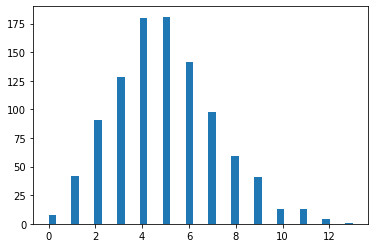

In [89]:
count, bins, ignored = plt.hist(y, 40, density=False)

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson1_hist.png')
plt.show()

#### 일부를 그린다

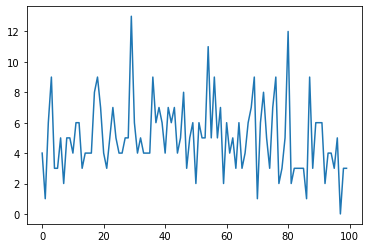

In [90]:
n = 100
plt.plot( y[0:n])

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson1_plot.png')
plt.show()

일반화 선형모델 문제를 푼다

In [91]:
x = range(len(y))
df = pd.DataFrame({'x':x, 'y':y})

In [97]:
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2218.8
Date:                Wed, 21 Apr 2021   Deviance:                       1096.6
Time:                        19:41:16   Pearson chi2:                 1.04e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5577      0.029     54.239      0.0

<ipython-input-97-74585cacf405>:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()


In [100]:
b0, b1 = result.params
print('exp(b0) =',np.exp(b0)) 

exp(b0) = 4.747733034265266


In [101]:
print('Mean of y =',df.y.mean())

Mean of y = 4.94


#### 포아송분포를 따르는 확률변수 ｙ의 데이터 생성
$\lambda = \exp(\beta_0 + \beta_1 x1)$, 의 경우 

In [10]:
Num = 1000
x = np.zeros(Num)
y = np.zeros(Num)

In [11]:
b0 , b1 = 0.5, 3.5
for i in range(Num):
    x[i] = i
    lam = np.exp( b0 + (b1/float(Num)) * (float(i)))
    y[i] = np.random.poisson(lam,1)

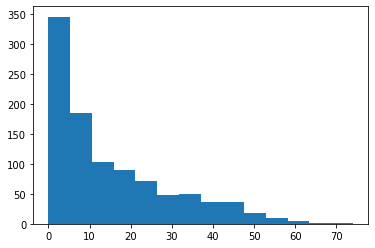

In [12]:
count, bins, ignored = plt.hist(y, 14, density=False)

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson2_hist.png')
plt.show()

In [ ]:
plt.scatter(x, y)

In [13]:
df = pd.DataFrame({'x':x, 'y':y})
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.2
Date:                Fri, 27 Dec 2019   Deviance:                       1035.6
Time:                        21:23:03   Pearson chi2:                 1.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5198      0.028     18.355      0.0

C:\Users\KTKwon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


아래에　b1 = b1 * num 으로 한 것은，glm은 lam 생성식에 있는 (b1/float(num))을 예측하고, 분모를 제거하기 위한 것이다

In [15]:
b0, b1 = result.params
b1 = b1 * Num  # 파라미터 분모(num)가 있기 때문에, 이것을 제거한다
print("b0 = %f  b1 = %f" % (b0,b1))
#e_b0 = np.exp(b0)
#e_b1 = np.exp(b1)
#print("exp(b0) = %f  exp(b1) = %f" % (e_b0, e_b1))

b0 = 0.519759  b1 = 3.469264


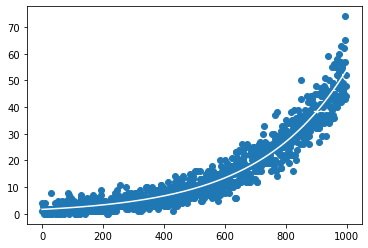

In [16]:
y_pre = np.exp(b0 + (b1/float(Num))*x)
plt.scatter(x[0:Num], y[0:Num])
plt.plot(x, y_pre, color = 'white')

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson2_plot.png')
plt.show()

#### 데이터의 전반 500개 [0:499]와 후반 500개 [500:999]를 서버 바꾼다

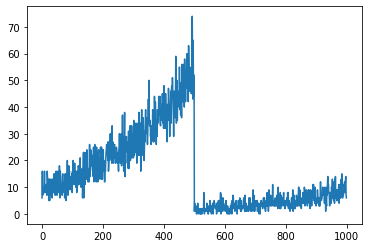

In [17]:
nlen = len(x)
n2 = int(nlen/2)

xx = np.zeros(nlen)  # 이 1행은 이른바, copy.deepcopy() ( import copy )를 의미하는 메모리 확보
if nlen % 2 == 0: #even
    nst = n2
else:
    nst = n2 + 1
    xx[n2] = x[n2]
    
xx[0:n2] = x[nst:nlen]
xx[nst:nlen]= x[0:n2]
"""
print(xx[0:5])
print(xx[(n2-1):(n2+4)])
print(xx[-5:])
"""
yy = np.zeros(nlen)  # 이 1행은 이른바  copy.deepcopy() ( import copy )를 의미하는 메모리 확보
yy[0:n2] = y[nst:nlen]
yy[nst:nlen]= y[0:n2]

plt.plot(yy[0:nlen]) # 주의：plot(xx,yy)라고 하면, 앞의 그래프와 동일하게 된다

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson3_plot.png')
plt.show()

In [18]:
df = pd.DataFrame({'x':xx, 'y':yy})
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.2
Date:                Fri, 27 Dec 2019   Deviance:                       1035.6
Time:                        21:39:40   Pearson chi2:                 1.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5198      0.028     18.355      0.0

C:\Users\KTKwon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Generalized Linear Models
 약품과 장수풍뎅이의 생존률
원저：Annette J. Dobson and Adrian G. Barnett, An Introduction to Generalized Linear Models, 3rd ed. , CRCPress 2008, p.127  
https://reneues.files.wordpress.com/2010/01/an-introduction-to-generalized-linear-models-second-edition-dobson.pdf


In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

FLAG_fig = False

x:투약량，n:장수풍뎅이의 총수，y:사망수

In [2]:
df = pd.DataFrame({'x':[1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.861, 1.8839],
                   'n':[59, 60, 62, 56, 63, 59, 62, 60],
                   'y':[ 6, 13, 18, 28, 52, 53, 61, 60]})
print(df)

        x   n   y
0  1.6907  59   6
1  1.7242  60  13
2  1.7552  62  18
3  1.7842  56  28
4  1.8113  63  52
5  1.8369  59  53
6  1.8610  62  61
7  1.8839  60  60


생존(n-y)과 그렇지 않는（y）식의 표현을 하는 경우，n-y가 생존인 것울 이용하여，<br>
glm_model = 'y + I(n-y) ~ x' <br>
이라는 표현을 이용한다.I() 내의'-'은 뺄셈을 나타낸다.I()가 없으면, 괄호 내의 '-’는 Patsy의 표기로 간주되어 '-y'는 y를 제거하게 된다.

In [3]:
glm_model = 'y + I(n-y) ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial(link=sm.families.links.logit)).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(n - y)']   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.715
Date:                Fri, 27 Dec 2019   Deviance:                       11.232
Time:                        21:50:58   Pearson chi2:                     10.0
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.7175      5.181    -11.720      0.0

C:\Users\KTKwon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


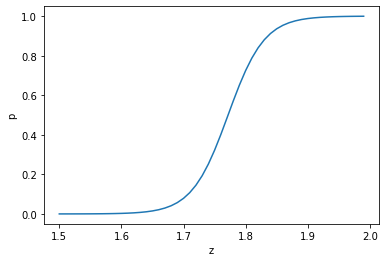

In [4]:
b0 , b1 = result.params
#x = np.arange(df.x.min(), df.x.max(), 0.1)
xx = np.arange(1.5, 2.0, 0.01)
#p = 1.0 /( 1.0 + np.exp( -(b0 + b1*xx ))) 
p = result.predict(exog = pd.DataFrame({'x': xx}))
plt.plot(xx,p)

plt.xlabel('z')
plt.ylabel('p')

if FLAG_fig: plt.savefig('fig_GLM_Logistic_Beetle.png')

# 일반화 선형모델　로지스틱 회귀모델
대상：Spector and Mazzeo (1980) - Program Effectiveness Data <br>
http://www.statsmodels.org/dev/datasets/generated/spector.html


In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#import seaborn as sns

np.random.seed(123)
FLAG_fig = False

In [2]:
data = sm.datasets.spector.load().data
df = pd.DataFrame(data)
print(df.head())

    GPA  TUCE  PSI  GRADE
0  2.66  20.0  0.0    0.0
1  2.89  22.0  0.0    0.0
2  3.28  24.0  0.0    0.0
3  2.92  12.0  0.0    0.0
4  4.00  21.0  0.0    1.0


C:\Users\KTKwon\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:344: FutureWarning: load will return datasets containing pandas DataFrames and Series in the Future.  To suppress this message, specify as_pandas=False
  FutureWarning)


In [3]:
glm_model = 'GRADE ~ GPA + TUCE + PSI'
fit = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial(link=sm.families.links.logit))
result = fit.fit()
print(result.summary())

C:\Users\KTKwon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                            GLM   Df Residuals:                       28
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.890
Date:                Fri, 27 Dec 2019   Deviance:                       25.779
Time:                        21:58:14   Pearson chi2:                     27.3
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.0213      4.931     -2.641      0.0

In [4]:
print(df.corr())

            GPA      TUCE       PSI     GRADE
GPA    1.000000  0.386986  0.039683  0.497147
TUCE   0.386986  1.000000  0.112780  0.303055
PSI    0.039683  0.112780  1.000000  0.422760
GRADE  0.497147  0.303055  0.422760  1.000000


혹시，세로축에 GRADE를 취하고，가로축에 GPA,색으로 PSI=1,0을 구별한 그래프가 무엇을 말하는가 확인하고 싶다.　
그러나，역시 유의한 특징을 발견할 수 없다.

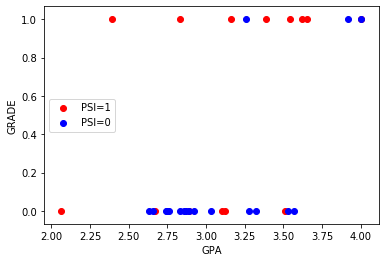

In [5]:
plt.scatter(df.GPA[df.PSI==1.0], df.GRADE[df.PSI == 1.0] ,c = "red", label = "PSI=1")
plt.scatter(df.GPA[df.PSI==0.0], df.GRADE[df.PSI == 0.0] ,c = "blue", label = "PSI=0")

plt.xlabel('GPA')
plt.ylabel('GRADE')
#plt.title('Red:PSI=1,  Blue:PSI=0')
plt.legend(loc='center left')

다음에，GRADE=1,0으로 그룹을 나누어, GPA에 관한 상자그림을 그린다.  
이것을 보아도, 그다지 유의한 특징을 찾을 수 없다.

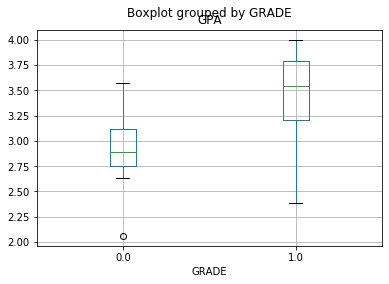

In [6]:
df.boxplot(column=['GPA'], by='GRADE') #by는 그룹별로 보는 줄을 지정한다